In [1]:
# Edit this cell to print out your name.
print "My name is %s" % ("Noraya Pettiway")

My name is Noraya Pettiway


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [2]:
# Your code here
# Analytically
oneday= .20 # Chance that it will rain one day in the month 
otherdays= .80 # Chance that it will not rain 
prob = (oneday * otherdays**29) * 30 

print "Probability that it will rain on one and only one day in the month is %f" % (prob)
 
# and is mult., or is addition 

Probability that it will rain on one and only one day in the month is 0.009285


In [3]:
# Numerically
import numpy as np

rd_num=np.random.random() #how to get random number to generate data 

# Setting up the boundaries for when it will rain and not rain
if rd_num >= 0 and rd_num < 0.2: # limits for the rnd # with the probability that it will rain 20%
    print "It will rain :("
elif rd_num >= 0.2 and rd_num < 1.0: # limits for the rnd # with the probability that it will not rain 80%
    print "It will not rain :)"

# Creating a function that will generate a fake month   
def rain(): #create a function to loop through data 
    
    ndays = 30 # number of days in a month 
    
    total = 0 # beginning value (Place holder)
    for i in range(0,ndays): # range between 0 and 30 days 
        rain_day = np.random.random() # this will give the random number 
        if rain_day >=0 and rain_day < 0.2:
            one_day = True # if the random number falls between this boundary it will rain one day
            if one_day==True: # nested conditional to be able to count and track
                total +=1 # how many days it rains in a given month 
                 #print one_day
        elif rain_day >=0.2 and rain_day < 1.0:
            one_day = False # if random number falls between this boundary it will not rain 
            #print one_day
    return total #return to test it, this is will return the number of days that it rained in one month

# Running over a lot of data to find the odds that it rains one day in a month
ndays = 100000 # The more days that you have the better 
total = 0 # Place holder to start keeping track of how many months have one day with rain
for i in range(0,ndays): # Getting a random number 1000 times 
    rain_day = np.random.random()
    
    if rain()==1: # If the returned value of the rain function is equal to 1, which is equivalent to one day of rain a month 
        total +=1 # then add that month to all the other months until the loop is done.
#print "The number of months that have the odds of one day and only one day of rain are %0.1f" %(total)       
print "The percent is %f" %(100*total/float(ndays)) # Convert to float or else it would go right to nearest integer which would be 0


It will not rain :)
The percent is 0.908000


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [5]:
# Your code here

# Set limits for when it will rain and when it will not rain 
if rd_num >= 0 and rd_num < 0.1: # limits for the rnd # with the probability that it will rain 10% 
    print "It will rain :("
elif rd_num >= 0.1 and rd_num < 1.0: # limits for the rnd # with the probability that it will not rain 90%
    print "It will not rain :)"

# Create a function in order to generate a fake month 
def rain(): #create a function to loop through data 
    
    ndays = 30 # number of days in a month 
    
    total = 0 # beginning value (Place holder)
    for i in range(0,ndays): # range between 0 and 30 days 
        rain_day = np.random.random() # this will give the random number 
        if rain_day >=0 and rain_day < 0.1:
            rain_8 = True # if the random number falls between this boundary it will rain one day
            total += 1
        elif rain_day >=0.1 and rain_day < 1.0:
            rain_8 = False # if random number falls between this boundary it will not rain 
            
    return total #return to test how many days it rained in a month 
print rain()

# Running over a lot of data to see when it rains at least 8 days
ndays = 100000 # More days the better 
total = 0 # Keeping track of the months it rains
for i in range(0,ndays): # Ranges from 0 to 5000 days 
    rain_day = np.random.random() #Generates random number
    
    if rain() >= 8: # If the function, rain, returns at least 8 days of rain
        total += 1  # then that month can be added to the total until the loop is done. 
        
#print "The number of months that it rains at least 8 days is %0.1f" %(total)
print "The percent is %f" %(100*total/float(ndays))

It will not rain :)
6
The percent is 0.757000


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [6]:
# Your code here

# Need to do a loop of one day and then a loop for the next day and check and do the probability. 

def rainfall():
    
    
    rd_rain = np.random.random() # Gives the random number between 0 and 1 

    rain_amt = 0 # Place holder to define and introduce the variable 
    if rd_rain >= 0 and rd_rain < 0.2: # If the random number lands btwn these boundaries then it will rain 1 cm, starting
        rain_amt = 1 #cm                # with the 20% chance        
    
    elif rd_rain >= 0.2 and rd_rain < 0.5: # If the random number lands btwn these boundaries then it will rain 2 cm,then add 
        rain_amt = 2 #cm                  # the 30% chance of 2cm to the 20% chance for 1 cm and get to 50%
    
    elif rd_rain >= 0.5 and rd_rain < 0.8: # If the random number lands btwn these boundaries then it will rain 3 cm, then add
        rain_amt = 3 #cm                  # the 30% chance of 3cm to the 50% total and get to 80% 
    
    elif rd_rain >= 0.8 and rd_rain < 0.9: # If the random number lands btwn these boundaries then it will rain 4 cm, then add
        rain_amt = 4 #cm                  # the 10% chance of 4cm to the 80% total and get to 90% 
    
    elif rd_rain >=0.9 and rd_rain < 1.0: # If the random number lands btwn these boundaries then it will rain 5 cm, then add
        rain_amt = 5 # cm                # the 10% chance of 5cm to the 90% total and get to 100%
    
    return rain_amt

print rainfall()
   


3


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


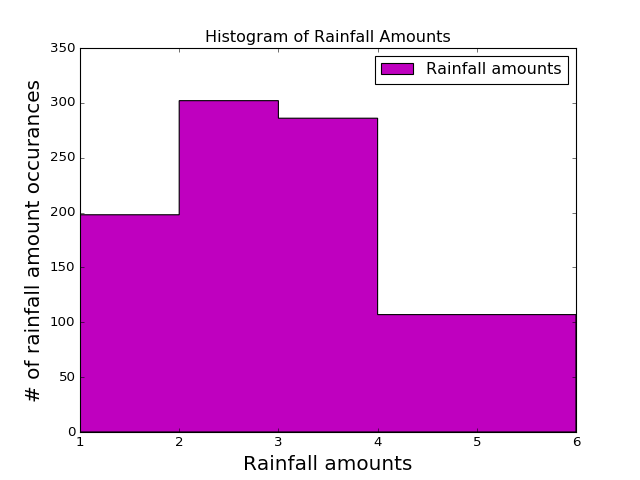

In [7]:
# Histogram of the amount of rainfall 
import matplotlib.pylab as plt # Need this to graph 
%matplotlib notebook 
# Line above will do the graph here in the notebook instead of seperate window
ndays = 1000 # The number of days we are testing 

values = [] # Creating an empty list to put data into later
for i in range(0,ndays): # Looping thru 1000 numbers 
    
    value = rainfall() # Values from the rainfall amounts
    values.append(value) # Adding these values back to the list 
    
plt.figure() # Making an empty plot

plt.hist(values,bins=5,range=(1,6),color='m',histtype='stepfilled',label='Rainfall amounts') # Values is the rainfall amount, bins is the 5 rainfall values. range goes from the min value to the max value, set a color, and then stepfilled will give lines btwn the bins, and then label the legend 


plt.xlabel("Rainfall amounts",fontsize=18) # Label for both x and y axis and 
plt.ylabel("# of rainfall amount occurances",fontsize=18)   # making the font size bigger than the default

plt.xlim(1,6) # x-axis range

plt.title("Histogram of Rainfall Amounts") # Title for the plot

plt.legend(numpoints=1) # The key for the histogram



### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [ ]:
# Your code here?

### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [ ]:
# Your code here